# ML Term Paper - Code: Describe Data
by Ann-Christin and Sarah 18/02/21

This notebook uses the piaac_red file to describe the data used in the analysis. 

In [53]:
# Packages to import 

import re

import random
#from PIL import Image
import seaborn as sns
import sklearn.decomposition
import sklearn.manifold
import umap #if missing: pip install umap
import scipy.stats



import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import ensemble
from sklearn import tree as tree
from pandas import Series, DataFrame
print("done")

done


In [54]:
import os
path = "E:\Data\krea\PIAAC"
os.chdir(path)
print("done")

done


In [55]:
data = pd.read_csv("data\piaac_red.csv", sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
data.shape

(230691, 132)

In [4]:
data.describe()

Unnamed: 0 cntry cntry_e inpiaac   seqid cnt_brth ageg10lfs   age_r  \
count      230691  3660    3660    3660  230691   160270    227031  166949   
unique     230691     1       1       2   26967      182         5      50   
top        129637   USA     USA     1.0  2678.0   Poland     35-44    21.0   
freq            1  3660    3660    3296      35     9612     46872    3872   

       gender_r  j_q03b  ...                                    nfe12jr  \
count    230689  103091  ...                                     216972   
unique        2      24  ...                                          2   
top      Female     2.0  ...  Did not participate in NFE for JR reasons   
freq     122830   44747  ...                                     140246   

                                          nfe12njr  \
count                                       216972   
unique                                           2   
top     Did not participate in NFE for NJR reasons   
freq                                        200186   

                                               fnfaet12  \
count                                            200153   
unique                                                2   
top     Did not participate in formal or non-formal AET   
freq                                             106426   

                                               fnfaet12jr  \
count                                              198853   
unique                                                  2   
top     Did not participate in formal or non-formal AE...   
freq                                               122590   

                                              fnfaet12njr nfehrsnjr nfehrsjr  \
count                                              198853     54687    54687   
unique                                                  2       539      568   
top     Did not participate in formal or non-formal AE...       0.0      0.0   
freq                                               182689     32659     6681   

       nfehrs     nopaidworkever unempflag  
count   80121             228135      3477  
unique    474                  2         2  
top      40.0  Has had paid work       0.0  
freq     6877             204720      3339  

[4 rows x 132 columns]

## Changing Data Types

In [56]:
data['gender_r'] = data['gender_r'].astype('category')
data["age_r"] = pd.to_numeric(data["age_r"])
data['b_q12a'] = data['b_q12a'].astype('category') # yes/no open educational training
data['b_q12b'] = pd.to_numeric(data["b_q12b"]) # number of open/distance educational trainings
data["b_q12d"] = pd.to_numeric(data["b_q12d"]) # number of on-the-job training
data['b_q12e'] = data['b_q12e'].astype('category')  # yes/no seminars training
data['b_q12f'] = pd.to_numeric(data["b_q12f"]) # number of seminars
data['b_q12g'] = data['b_q12g'].astype('category')  # yes/no private training
data['b_q12h'] = pd.to_numeric(data["b_q12h"]) # number of private educational trainings
data['j_q03a'] = data['j_q03a'].astype('category') # yes/no children
data['j_q03b'] = pd.to_numeric(data['j_q03b']) # number of children
data['yrsqual_t'] = pd.to_numeric(data['yrsqual_t'])
data['yrsget'] = pd.to_numeric(data['yrsget'])
data['iscoskil4'] = data['iscoskil4'].astype('category')
data['h_q05g'] = data['h_q05g'].astype('category') # Skill use everyday life - ICT - Computer - How often - Programming language  
data['g_q05g'] = data['g_q05g'].astype('category') # skill use work - ICT programming lanugage how often
#data['g_q05'] = data['g_q05'].astype('category') # use computer at work yes/no

## Summary Statistics

In [6]:
data['gender_r'].describe

<bound method NDFrame.describe of 0           Male
1           Male
2         Female
3         Female
4           Male
           ...  
230686      Male
230687      Male
230688    Female
230689      Male
230690      Male
Name: gender_r, Length: 230691, dtype: category
Categories (2, object): ['Female', 'Male']>

In [7]:
data['gender_r'].value_counts()

Female    122830
Male      107859
Name: gender_r, dtype: int64

In [8]:
#data['age_r'] = data['age_r'].fillna(0)
#data['age_r'].describe

In [9]:

data['age_r'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: age_r, Length: 230691, dtype: float64>

In [10]:
data['age_r'].value_counts()

21.0    3872
23.0    3862
19.0    3823
20.0    3802
22.0    3721
26.0    3683
24.0    3671
40.0    3632
25.0    3589
39.0    3517
37.0    3502
41.0    3462
38.0    3461
36.0    3458
33.0    3425
31.0    3424
34.0    3417
35.0    3415
30.0    3414
32.0    3385
47.0    3370
45.0    3365
42.0    3360
17.0    3353
18.0    3353
48.0    3350
29.0    3340
46.0    3321
43.0    3321
44.0    3289
49.0    3266
52.0    3236
28.0    3201
55.0    3192
27.0    3184
53.0    3173
50.0    3172
64.0    3158
51.0    3147
56.0    3125
16.0    3123
57.0    3092
58.0    3074
54.0    3070
59.0    3018
60.0    3003
62.0    2998
61.0    2992
63.0    2982
65.0    2786
Name: age_r, dtype: int64

In [11]:
#data['age_r'] = data['age_r'].astype('integer')

In [12]:
data['age_r'].describe

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: age_r, Length: 230691, dtype: float64>

In [13]:
data[["age_r"]].mean()

age_r    39.687485
dtype: float64

In [14]:
data[["gender_r", "age_r"]].groupby("gender_r").mean()

age_r
gender_r           
Female    39.957589
Male      39.378828

In [15]:

data['b_q12d'].describe


<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12d, Length: 230691, dtype: float64>

In [16]:
#data.groupby('b_q12d').describe()
data.groupby('b_q12d').describe().unstack(1)

               b_q12d
age_r   count  0.0          31.0
               1.0       14106.0
               2.0        9846.0
               3.0        5918.0
               4.0        3196.0
                          ...   
b_q12h  max    46.0          NaN
               47.0          NaN
               48.0         45.0
               49.0          NaN
               50.0         50.0
Length: 2520, dtype: float64

In [165]:

data['b_q12b'].describe # number of open/distance educational trainings

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12b, Length: 230691, dtype: float64>

In [166]:

data['b_q12a'].describe# yes/no open educational training

<bound method NDFrame.describe of 0          No
1         Yes
2          No
3          No
4         Yes
         ... 
230686     No
230687     No
230688     No
230689     No
230690     No
Name: b_q12a, Length: 230691, dtype: category
Categories (2, object): ['No', 'Yes']>

In [104]:

data['b_q12e'].describe # yes/no semianrs / workshops

<bound method NDFrame.describe of 0          No
1         Yes
2          No
3          No
4          No
         ... 
230686    Yes
230687     No
230688     No
230689     No
230690     No
Name: b_q12e, Length: 230691, dtype: category
Categories (2, object): ['No', 'Yes']>

In [170]:

data['b_q12f'].describe # number of seminars 

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12f, Length: 230691, dtype: float64>

In [171]:

data['b_q12g'].describe # yes/no private training

<bound method NDFrame.describe of 0         No
1         No
2         No
3         No
4         No
          ..
230686    No
230687    No
230688    No
230689    No
230690    No
Name: b_q12g, Length: 230691, dtype: category
Categories (2, object): ['No', 'Yes']>

In [172]:

data['b_q12h'].describe # number of private educational trainings

<bound method NDFrame.describe of 0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
230686   NaN
230687   NaN
230688   NaN
230689   NaN
230690   NaN
Name: b_q12h, Length: 230691, dtype: float64>

In [173]:

data['iscoskil4'].describe

<bound method NDFrame.describe of 0         A
1         1
2         4
3         2
4         1
         ..
230686    2
230687    3
230688    2
230689    3
230690    1
Name: iscoskil4, Length: 230691, dtype: category
Categories (7, object): ['1', '2', '3', '4', 'A', 'N', 'U']>

In [175]:

data['j_q03b'].describe # number of children

<bound method NDFrame.describe of 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
230686    NaN
230687    NaN
230688    NaN
230689    NaN
230690    NaN
Name: j_q03b, Length: 230691, dtype: object>

In [112]:

data['yrsqual_t'].describe

<bound method NDFrame.describe of 0          NaN
1         19.0
2          NaN
3          NaN
4          NaN
          ... 
230686     NaN
230687     NaN
230688     NaN
230689     NaN
230690     NaN
Name: yrsqual_t, Length: 230691, dtype: category
Categories (21, object): ['10.0', '11.0', '12.0', '13.0', ..., '6.0', '7.0', '8.0', '9.0']>

In [114]:
data['yrsget'].describe

<bound method NDFrame.describe of 0          NaN
1         19.0
2          NaN
3          NaN
4          NaN
          ... 
230686     8.0
230687    11.0
230688    11.0
230689    12.0
230690     NaN
Name: yrsget, Length: 230691, dtype: category
Categories (22, object): ['0.0', '10.0', '11.0', '12.0', ..., '6.0', '7.0', '8.0', '9.0']>

In [115]:

data['h_q05g'].describe

<bound method NDFrame.describe of 0         Never
1         Never
2         Never
3         Never
4         Never
          ...  
230686    Never
230687      NaN
230688    Never
230689    Never
230690      NaN
Name: h_q05g, Length: 230691, dtype: category
Categories (5, object): ['At least once a week but not every day', 'Every day', 'Less than once a month', 'Less than once a week but at least once a month', 'Never']>

In [122]:
#col_names = ['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']

for ii in ['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']:
    print(data[[ii]].mean)
   
    
    
    
    #for ii, band in enumerate(bands):
    #    sns.histplot(dataframe[band].values.reshape(-1,), ax=ax[ii], kde=True, bins=25) # Reshape into 1D array
     #   ax[ii].set_title('{} band'.format(band_names[ii])) # Subplot titles

#data[['age_r', 'gender_r', 'b_q12d', 'b_q12a', 'b_q12e', 'iscoskil4', 'yrsqual_t', 'yrsget', 'h_q05g']].describe()

<bound method NDFrame._add_numeric_operations.<locals>.mean of         age_r
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
...       ...
230686    NaN
230687    NaN
230688    NaN
230689    NaN
230690    NaN

[230691 rows x 1 columns]>
<bound method NDFrame._add_numeric_operations.<locals>.mean of        gender_r
0          Male
1          Male
2        Female
3        Female
4          Male
...         ...
230686     Male
230687     Male
230688   Female
230689     Male
230690     Male

[230691 rows x 1 columns]>
<bound method NDFrame._add_numeric_operations.<locals>.mean of         b_q12d
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
230686     NaN
230687     NaN
230688     NaN
230689     NaN
230690     NaN

[230691 rows x 1 columns]>
<bound method NDFrame._add_numeric_operations.<locals>.mean of        b_q12a
0          No
1         Yes
2          No
3          No
4         Yes
...       ...
230686     No
230687     N

## Histograms
### Plots of demographics

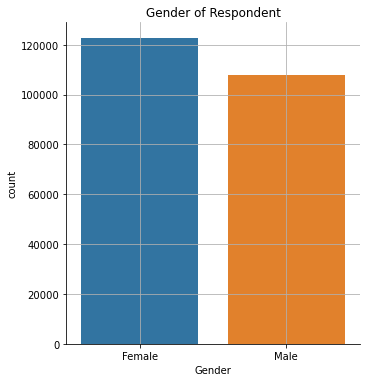

In [27]:
sns_plot = sns.catplot(x="gender_r", kind="count", data=data)
plt.title('Gender of Respondent')
plt.grid(axis='both')
plt.xlabel('Gender')
sns_plot.savefig("plots/barplot_gender.png")


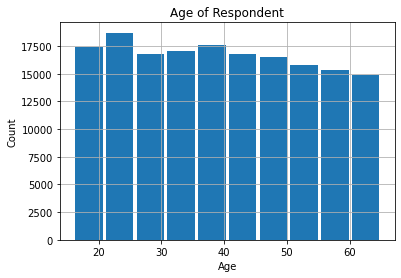

In [117]:
plt.hist(x='age_r', bins=10, range=None, density=False,  histtype='bar',rwidth=0.9, data=data)
plt.title('Age of Respondent')
plt.grid(axis='both')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('plots\hist_age.png', bbox_inches='tight')

### Trainings - plots

- b_q12b = number of open/distance educational trainings
- b_q12d = number of on-the-job training
- b_q12f = number of seminars
- b_q12h = number of private educational trainings

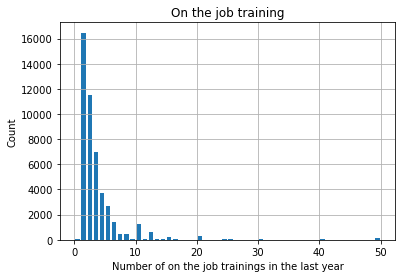

In [134]:
plt.hist(x='b_q12d', bins=50, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
plt.title('On the job training')
plt.grid(axis='both')
plt.xlabel('Number of on the job trainings in the last year')
plt.ylabel('Count')
plt.savefig('plots\hist_count_onthejob.png', bbox_inches='tight')


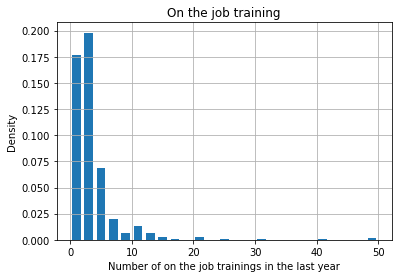

In [121]:
plt.hist(x='b_q12d', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
plt.title('On the job training')
plt.grid(axis='both')
plt.xlabel('Number of on the job trainings in the last year')
plt.ylabel('Density')
plt.savefig('plots\hist_density_onthejob.png', bbox_inches='tight')


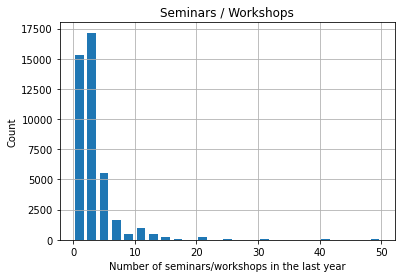

In [122]:
plt.hist(x='b_q12f', bins=25, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
plt.title('Seminars / Workshops')
plt.grid(axis='both')
plt.xlabel('Number of seminars/workshops in the last year')
plt.ylabel('Count')
plt.savefig('plots\hist_count_seminars.png', bbox_inches='tight')


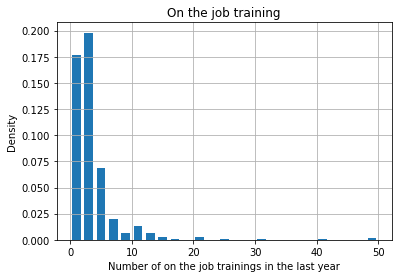

In [123]:
plt.hist(x='b_q12d', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
plt.title('On the job training')
plt.grid(axis='both')
plt.xlabel('Number of on the job trainings in the last year')
plt.ylabel('Density')
plt.savefig('plots\hist_density_onthejob.png', bbox_inches='tight')


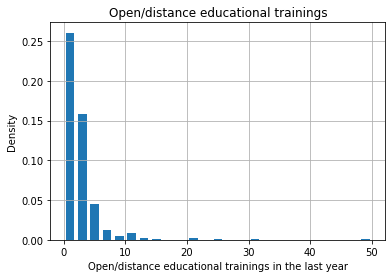

In [125]:
plt.hist(x='b_q12b', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
plt.title('Open/distance educational trainings')
plt.grid(axis='both')
plt.xlabel('Open/distance educational trainings in the last year')
plt.ylabel('Density')
plt.savefig('plots\hist_density_open.png', bbox_inches='tight')


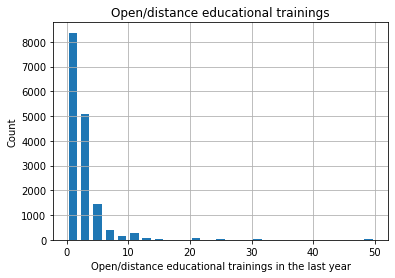

In [124]:
plt.hist(x='b_q12b', bins=25, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
plt.title('Open/distance educational trainings')
plt.grid(axis='both')
plt.xlabel('Open/distance educational trainings in the last year')
plt.ylabel('Count')
plt.savefig('plots\hist_count_open.png', bbox_inches='tight')


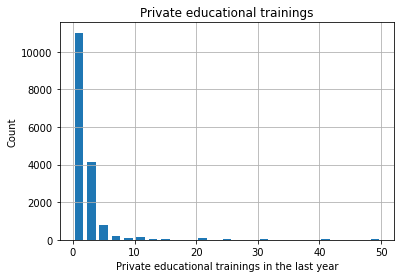

In [126]:
plt.hist(x='b_q12h', bins=25, range=None, density=False,  histtype='bar',rwidth=0.7, data=data)
plt.title('Private educational trainings')
plt.grid(axis='both')
plt.xlabel('Private educational trainings in the last year')
plt.ylabel('Count')
plt.savefig('plots\hist_count_private.png', bbox_inches='tight')


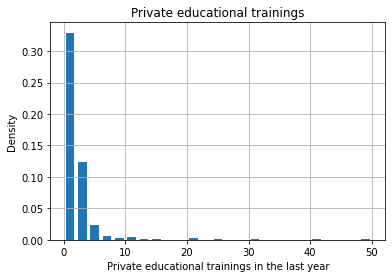

In [127]:
plt.hist(x='b_q12h', bins=25, range=None, density=True,  histtype='bar',rwidth=0.7, data=data)
plt.title('Private educational trainings')
plt.grid(axis='both')
plt.xlabel('Private educational trainings in the last year')
plt.ylabel('Density')
plt.savefig('plots\hist_density_private.png', bbox_inches='tight')


### Plots - Skills

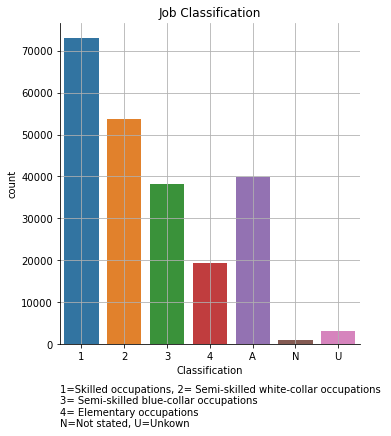

In [141]:
sns_plot = sns.catplot(x="iscoskil4", kind="count", data=data)
plt.title('Job Classification')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.annotate('1=Skilled occupations, 2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

sns_plot.savefig("plots/barplot_job_classification.png")


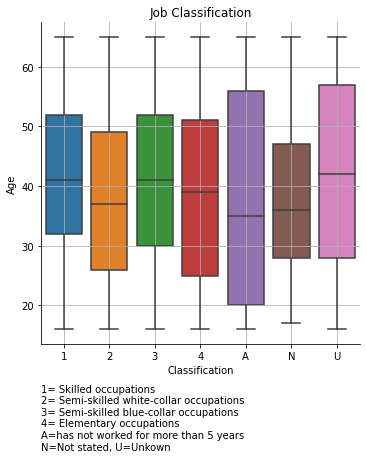

In [185]:
sns_plot = sns.catplot(x="iscoskil4", y="age_r",kind="box", data=data)
plt.title('Job Classification')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Age')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nA=has not worked for more than 5 years \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

sns_plot.savefig("plots/box_age_job_classification.png")


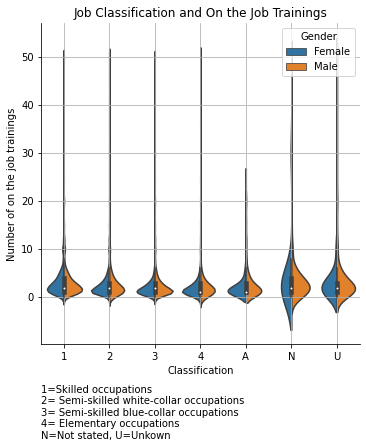

In [155]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12d",kind="violin", hue="gender_r", split=True,data=data, legend=False)
plt.title('Job Classification and On the Job Trainings')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Number of on the job trainings')
plt.annotate('1=Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("plots/violin_gender_OntheJob_classification.png")


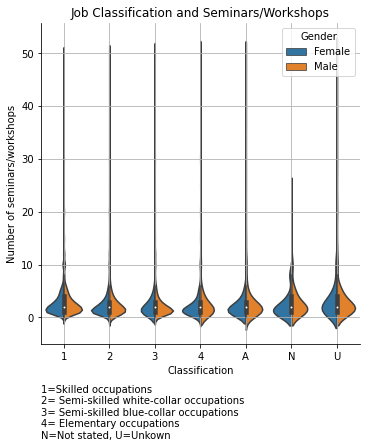

In [182]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12f",kind="violin", hue="gender_r", split=True,data=data, legend=False)
plt.title('Job Classification and Seminars/Workshops')
plt.grid(axis='both')
plt.xlabel('Classification')
plt.ylabel('Number of seminars/workshops')
plt.annotate('1=Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("plots/violin_gender_seminars_classification.png")


In [ ]:
b_q12d

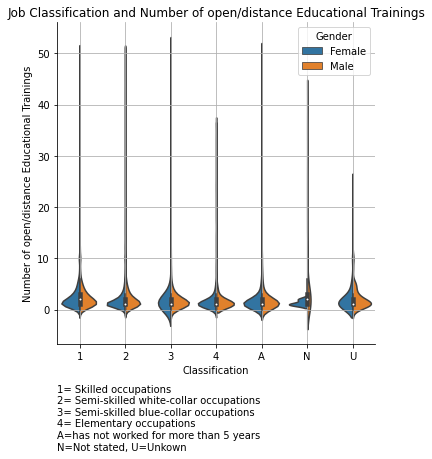

In [191]:
sns_plot = sns.catplot(x="iscoskil4", y="b_q12b",kind="violin",hue="gender_r", split=True, data=data,  legend=False)
plt.title('Job Classification and Number of open/distance Educational Trainings')
plt.grid(axis='both')
plt.ylabel('Number of open/distance Educational Trainings')
plt.xlabel('Classification')
plt.annotate('1= Skilled occupations \n2= Semi-skilled white-collar occupations \n3= Semi-skilled blue-collar occupations \n4= Elementary occupations \nA=has not worked for more than 5 years \nN=Not stated, U=Unkown', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(title='Gender',loc='upper right')
sns_plot.savefig("plots/violin_gender_open_classification.png")


## Regressions to test for correlations between middle-skilled jobs and trainings

- b_q12b = number of open/distance educational trainings
- b_q12d = number of on-the-job training
- b_q12f = number of seminars
- b_q12h = number of private educational trainings

In [57]:
import statsmodels.formula.api as sm
from stargazer.stargazer import Stargazer

### Prepare for Regression - Create dummies 

- for the occupational level
- for the use of ICT skill





In [77]:
data2 = pd.get_dummies(data, columns = ['iscoskil4', 'h_q05g', 'g_q05g'])
data2.head

<bound method NDFrame.head of        Unnamed: 0 cntry cntry_e inpiaac    seqid cnt_brth ageg10lfs  age_r  \
0               0   USA     USA     1.0   9355.0      NaN       NaN    NaN   
1               1   USA     USA     1.0  10882.0      NaN       NaN    NaN   
2               2   USA     USA     1.0  12329.0      NaN       NaN    NaN   
3               3   USA     USA     1.0  10711.0      NaN       NaN    NaN   
4               4   USA     USA     1.0  10383.0      NaN       NaN    NaN   
...           ...   ...     ...     ...      ...      ...       ...    ...   
230686     230686   NaN     NaN     NaN   5126.0  Austria     45-54    NaN   
230687     230687   NaN     NaN     NaN   5127.0   Serbia     25-34    NaN   
230688     230688   NaN     NaN     NaN   5128.0  Austria     35-44    NaN   
230689     230689   NaN     NaN     NaN   5129.0  Austria     25-34    NaN   
230690     230690   NaN     NaN     NaN   5130.0  Austria   55 plus    NaN   

       gender_r  j_q03b  ... h_q0

In [78]:
data2.rename(columns={'h_q05g_Every day': 'h_q05g_5', 'h_q05g_At least once a week but not every day': 'h_q05g_4','h_q05g_Less than once a week but at least once a month': 'h_q05g_3', 'h_q05g_Less than once a month': 'h_q05g_2', 'h_q05g_Never': 'h_q05g_1'}, inplace=True)
data2.rename(columns={'g_q05g_Every day': 'g_q05g_5', 'g_q05g_At least once a week but not every day': 'g_q05g_4','g_q05g_Less than once a week but at least once a month': 'g_q05g_3', 'g_q05g_Less than once a month': 'g_q05g_2', 'g_q05g_Never': 'g_q05g_1'}, inplace=True)

data2.head()


Unnamed: 0 cntry cntry_e inpiaac    seqid cnt_brth ageg10lfs  age_r  \
0          0   USA     USA     1.0   9355.0      NaN       NaN    NaN   
1          1   USA     USA     1.0  10882.0      NaN       NaN    NaN   
2          2   USA     USA     1.0  12329.0      NaN       NaN    NaN   
3          3   USA     USA     1.0  10711.0      NaN       NaN    NaN   
4          4   USA     USA     1.0  10383.0      NaN       NaN    NaN   

  gender_r  j_q03b  ... h_q05g_4 h_q05g_5 h_q05g_2 h_q05g_3 h_q05g_1 g_q05g_4  \
0     Male     NaN  ...        0        0        0        0        1        0   
1     Male     NaN  ...        0        0        0        0        1        0   
2   Female     NaN  ...        0        0        0        0        1        0   
3   Female     NaN  ...        0        0        0        0        1        0   
4     Male     NaN  ...        0        0        0        0        1        0   

  g_q05g_5 g_q05g_2 g_q05g_3 g_q05g_1  
0        0        0        0        0  
1        0        0        0        1  
2        0        0        0        0  
3        0        0        0        1  
4        0        0        0        1  

[5 rows x 146 columns]

#### Number of on-the-job training

In [79]:
result_ojt = sm.ols(formula="b_q12d ~  gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_ojt.summary()

#print(result.params)




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 b_q12d   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     39.96
Date:                Fri, 19 Feb 2021   Prob (F-statistic):          2.49e-132
Time:                        18:41:32   Log-Likelihood:            -1.2962e+05
No. Observations:               44665   AIC:                         2.593e+05
Df Residuals:                   44647   BIC:                         2.594e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2688      0.215      5.896      0.000       0.847       1.691
gender_r[T.Male]    -0.0362      0.045     -0.803      0.422      -0.125       0.052
j_q03a[T.Yes]        0.0392      0.044      0.884      0.377      -0.048       0.126
yrsqual_t            0.1032      0.008     13.098      0.000       0.088       0.119
iscoskil4_1          0.8468      0.190      4.464      0.000       0.475       1.219
iscoskil4_2          0.3268      0.191      1.712      0.087      -0.047       0.701
iscoskil4_3          0.1007      0.196      0.515      0.607      -0.283       0.484
iscoskil4_4          0.0279      0.211      0.132      0.895      -0.385       0.441
iscoskil4_U          0.6697      0.283      2.369      0.018       0.116       1.224
iscoskil4_N          0.9907      0.333      2.971      0.003       0.337       1.644
h_q05g_5            -0.1108      0.235     -0.472      0.637      -0.571       0.349
h_q05g_4             0.0981      0.175      0.562      0.574      -0.244       0.440
h_q05g_3            -0.0075      0.156     -0.048      0.962      -0.313       0.298
h_q05g_2            -0.1772      0.102     -1.741      0.082      -0.377       0.022
g_q05g_5            -0.1213      0.120     -1.013      0.311      -0.356       0.114
g_q05g_4            -0.2082      0.145     -1.434      0.151      -0.493       0.076
g_q05g_3            -0.1569      0.151     -1.039      0.299      -0.453       0.139
g_q05g_2             0.1275      0.108      1.185      0.236      -0.083       0.338
==============================================================================
Omnibus:                    49855.109   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4441031.468
Skew:                           5.842   Prob(JB):                         0.00
Kurtosis:                      50.432   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### number of open/distance educational trainings

In [80]:
result_od = sm.ols(formula="b_q12b ~ gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_od.summary()

#print(result.params)




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 b_q12b   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.67
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.32e-29
Time:                        18:42:09   Log-Likelihood:                -42897.
No. Observations:               15648   AIC:                         8.583e+04
Df Residuals:                   15630   BIC:                         8.597e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2778      0.184      6.946      0.000       0.917       1.638
gender_r[T.Male]     0.1520      0.064      2.366      0.018       0.026       0.278
j_q03a[T.Yes]        0.0734      0.062      1.177      0.239      -0.049       0.196
yrsqual_t            0.0488      0.011      4.379      0.000       0.027       0.071
iscoskil4_1          0.6564      0.125      5.246      0.000       0.411       0.902
iscoskil4_2          0.1636      0.128      1.279      0.201      -0.087       0.414
iscoskil4_3          0.1738      0.150      1.155      0.248      -0.121       0.469
iscoskil4_4         -0.2286      0.183     -1.252      0.211      -0.587       0.129
iscoskil4_U          0.1099      0.324      0.339      0.734      -0.525       0.745
iscoskil4_N          1.0160      0.432      2.353      0.019       0.170       1.862
h_q05g_5             0.3607      0.242      1.491      0.136      -0.114       0.835
h_q05g_4             0.0749      0.185      0.404      0.686      -0.288       0.438
h_q05g_3            -0.0553      0.170     -0.325      0.745      -0.388       0.278
h_q05g_2             0.1106      0.129      0.859      0.391      -0.142       0.363
g_q05g_5             0.1610      0.157      1.024      0.306      -0.147       0.469
g_q05g_4             0.1629      0.188      0.867      0.386      -0.205       0.531
g_q05g_3             0.0614      0.194      0.317      0.751      -0.318       0.441
g_q05g_2             0.0221      0.147      0.150      0.881      -0.267       0.311
==============================================================================
Omnibus:                    20315.328   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3711757.951
Skew:                           7.348   Prob(JB):                         0.00
Kurtosis:                      77.006   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### number of seminars


In [81]:
result_sem = sm.ols(formula="b_q12f ~  gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_sem.summary()

#print(result.params)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 b_q12f   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     17.97
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.41e-54
Time:                        18:42:19   Log-Likelihood:            -1.1287e+05
No. Observations:               40891   AIC:                         2.258e+05
Df Residuals:                   40873   BIC:                         2.259e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8989      0.129     14.694      0.000       1.646       2.152
gender_r[T.Male]     0.0343      0.040      0.858      0.391      -0.044       0.113
j_q03a[T.Yes]       -0.0456      0.041     -1.125      0.261      -0.125       0.034
yrsqual_t            0.0728      0.007      9.976      0.000       0.058       0.087
iscoskil4_1          0.2277      0.092      2.470      0.014       0.047       0.408
iscoskil4_2         -0.1339      0.096     -1.390      0.164      -0.323       0.055
iscoskil4_3         -0.3149      0.112     -2.808      0.005      -0.535      -0.095
iscoskil4_4         -0.1642      0.143     -1.150      0.250      -0.444       0.116
iscoskil4_U          0.1709      0.187      0.915      0.360      -0.195       0.537
iscoskil4_N          0.2356      0.289      0.816      0.415      -0.331       0.802
h_q05g_5             0.0579      0.188      0.308      0.758      -0.310       0.426
h_q05g_4             0.1045      0.139      0.752      0.452      -0.168       0.377
h_q05g_3            -0.0041      0.130     -0.031      0.975      -0.259       0.250
h_q05g_2            -0.0692      0.087     -0.793      0.428      -0.240       0.102
g_q05g_5            -0.0771      0.103     -0.751      0.452      -0.278       0.124
g_q05g_4             0.0828      0.123      0.675      0.499      -0.158       0.323
g_q05g_3             0.0681      0.125      0.545      0.586      -0.177       0.313
g_q05g_2             0.0254      0.091      0.279      0.781      -0.153       0.204
==============================================================================
Omnibus:                    45891.346   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4616614.517
Skew:                           5.841   Prob(JB):                         0.00
Kurtosis:                      53.726   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### number of private educational trainings

In [82]:
result_priv = sm.ols(formula="b_q12h ~  gender_r + yrsqual_t + j_q03a + iscoskil4_1 + iscoskil4_2 + iscoskil4_3 + iscoskil4_4 + iscoskil4_U + iscoskil4_N + h_q05g_5 + h_q05g_4 + h_q05g_3 + h_q05g_2 +g_q05g_5 + g_q05g_4 + g_q05g_3 + g_q05g_2", data=data2).fit()
result_priv.summary()

#print(result.params)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 b_q12h   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.446
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           1.85e-06
Time:                        18:42:27   Log-Likelihood:                -45719.
No. Observations:               16030   AIC:                         9.147e+04
Df Residuals:                   16012   BIC:                         9.161e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8062      0.192      9.390      0.000       1.429       2.183
gender_r[T.Male]     0.0134      0.072      0.185      0.853      -0.128       0.155
j_q03a[T.Yes]        0.0168      0.069      0.244      0.807      -0.118       0.152
yrsqual_t            0.0238      0.013      1.867      0.062      -0.001       0.049
iscoskil4_1          0.2112      0.120      1.754      0.079      -0.025       0.447
iscoskil4_2         -0.1356      0.122     -1.109      0.267      -0.375       0.104
iscoskil4_3         -0.3045      0.146     -2.083      0.037      -0.591      -0.018
iscoskil4_4         -0.1577      0.176     -0.898      0.369      -0.502       0.186
iscoskil4_U          0.2812      0.291      0.967      0.333      -0.289       0.851
iscoskil4_N         -0.1586      0.545     -0.291      0.771      -1.226       0.909
h_q05g_5             0.1628      0.343      0.475      0.635      -0.510       0.835
h_q05g_4             0.2120      0.229      0.925      0.355      -0.237       0.661
h_q05g_3            -0.1149      0.218     -0.528      0.597      -0.541       0.312
h_q05g_2            -0.1962      0.144     -1.358      0.174      -0.479       0.087
g_q05g_5             0.1360      0.207      0.656      0.512      -0.270       0.542
g_q05g_4             0.0151      0.252      0.060      0.952      -0.479       0.509
g_q05g_3            -0.1228      0.244     -0.504      0.614      -0.601       0.355
g_q05g_2             0.2976      0.180      1.654      0.098      -0.055       0.650
==============================================================================
Omnibus:                    21400.917   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3674877.122
Skew:                           7.800   Prob(JB):                         0.00
Kurtosis:                      75.516   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
stargazer = Stargazer([result_ojt, result_od, result_sem, result_priv])
stargazer.custom_columns(['On the job training', 'Open/Distance training', 'Seminars/Workshops', 'Private Lessons'], [1, 1, 1, 1])
stargazer.significant_digits(2)
stargazer.show_confidence_intervals(True)
stargazer.rename_covariates({'gender_r[T.Male]':'Gender:Male','g_q05g_3':'Programming at work-Less than once a week','g_q05g_4':'Programming at work-Less than everyday','g_q05g_5':'Programming at work-Everyday','g_q05g_2':'Programming at work-Less than once a month','h_q05g_3':'Programming at home-Less than once a week','h_q05g_4':'Programming at home-Less than everyday','h_q05g_5':'Programming at home-Everyday','h_q05g_2':'Programming at home-Less than once a month','iscoskil4_1':'Skilled occupations','iscoskil4_2':'Semi-skilled white-collar','iscoskil4_3':'Semi-skilled blue-collar','iscoskil4_4':'Elementary occupations','iscoskil4_U':'Unknown occupation','iscoskil4_N':'not stated occupation','j_q03a[T.Yes]':'Children:Yes','yrsqual_t':'Total years of schooling'})
#stargazer.rename_covariates({'g_q05g_3':'Programming at work-Less than once a week'})
#stargazer.rename_covariates({'g_q05g_4':'Programming at work-Less than everyday'})
#stargazer.rename_covariates({'g_q05g_5': 'Programming at work-Everyday'})
#stargazer.rename_covariates({'g_q05g_2': 'Programming at work-Less than once a month'})
stargazer
#stargazer.render_latex()
#stargazer.render_html()

In [114]:
#sns.regplot(x="b_q12d", y="iscoskil4", data=data)
#sns.lmplot(x="iscoskil4", y="b_q12h", data=data,x_estimator=np.mean)
#sns.lmplot(x="b_q12h", y="iscoskil4", data=data,logistic=True, y_jitter=.03)

In [115]:
#plt.scatter(x="yrsget", y="b_q12d", s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None, data=data)